# **Predicting Employee Retention**

### Objective

The objective of this assignment is to develop a Logistic Regression model. You will be using this model to analyse and predict binary outcomes based on the input data. This assignment aims to enhance understanding of logistic regression, including its assumptions, implementation, and evaluation, to effectively classify and interpret data.


### Business Objective

A mid-sized technology company wants to improve its understanding of employee retention to foster a loyal and committed workforce. While the organization has traditionally focused on addressing turnover, it recognises the value of proactively identifying employees likely to stay and understanding the factors contributing to their loyalty.


In this assignment you’ll be building a logistic regression model to predict the likelihood of employee retention based on the data such as demographic details, job satisfaction scores, performance metrics, and tenure. The aim is to provide the HR department with actionable insights to strengthen retention strategies, create a supportive work environment, and increase the overall stability and satisfaction of the workforce.

## Assignment Tasks

You need to perform the following steps to complete this assignment:
1. Data Understanding
2. Data Cleaning
3. Train Validation Split
4. EDA on training data
5. EDA on validation data [Optional]
6. Feature Engineering
7. Model Building
8. Prediction and Model Evaluation




## Data Dictionary

The data has 24 Columns and 74610 Rows. Following data dictionary provides the description for each column present in dataset:<br>

<table>
  <thead>
    <tr>
      <th>Column Name</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Employee ID</td>
      <td>A unique identifier assigned to each employee.</td>
    </tr>
    <tr>
      <td>Age</td>
      <td>The age of the employee, ranging from 18 to 60 years.</td>
    </tr>
    <tr>
      <td>Gender</td>
      <td>The gender of the employee.</td>
    </tr>
    <tr>
      <td>Years at Company</td>
      <td>The number of years the employee has been working at the company.</td>
    </tr>
    <tr>
      <td>Monthly Income</td>
      <td>The monthly salary of the employee, in dollars.</td>
    </tr>
    <tr>
      <td>Job Role</td>
      <td>The department or role the employee works in, encoded into categories such as Finance, Healthcare, Technology, Education, and Media.</td>
    </tr>
    <tr>
      <td>Work-Life Balance</td>
      <td>The employee's perceived balance between work and personal life (Poor, Below Average, Good, Excellent).</td>
    </tr>
    <tr>
      <td>Job Satisfaction</td>
      <td>The employee's satisfaction with their job (Very Low, Low, Medium, High).</td>
    </tr>
    <tr>
      <td>Performance Rating</td>
      <td>The employee's performance rating (Low, Below Average, Average, High).</td>
    </tr>
    <tr>
      <td>Number of Promotions</td>
      <td>The total number of promotions the employee has received.</td>
    </tr>
     </tr>
     <tr>
      <td>Overtime</td>
      <td>Number of overtime hours.</td>
    </tr>
    <tr>
      <td>Distance from Home</td>
      <td>The distance between the employee's home and workplace, in miles.</td>
    </tr>
    <tr>
      <td>Education Level</td>
      <td>The highest education level attained by the employee (High School, Associate Degree, Bachelor’s Degree, Master’s Degree, PhD).</td>
    </tr>
    <tr>
      <td>Marital Status</td>
      <td>The marital status of the employee (Divorced, Married, Single).</td>
    </tr>
     <tr>
      <td>Number of Dependents</td>
      <td>Number of dependents the employee has.</td>
    </tr>
    <tr>
      <td>Job Level</td>
      <td>The job level of the employee (Entry, Mid, Senior).</td>
    </tr>
    <tr>
      <td>Company Size</td>
      <td>The size of the company the employee works for (Small, Medium, Large).</td>
    </tr>
    <tr>
      <td>Company Tenure (In Months)</td>
      <td>The total number of years the employee has been working in the industry.</td>
    </tr>
    <tr>
      <td>Remote Work</td>
      <td>Whether the employee works remotely (Yes or No).</td>
    </tr>
    <tr>
      <td>Leadership Opportunities</td>
      <td>Whether the employee has leadership opportunities (Yes or No).</td>
    </tr>
    <tr>
      <td>Innovation Opportunities</td>
      <td>Whether the employee has opportunities for innovation (Yes or No).</td>
    </tr>
    <tr>
      <td>Company Reputation</td>
      <td>The employee's perception of the company's reputation (Very Poor, Poor, Good, Excellent).</td>
    </tr>
    <tr>
      <td>Employee Recognition</td>
      <td>The level of recognition the employee receives(Very Low, Low, Medium, High).</td>
    </tr>
    <tr>
      <td>Attrition</td>
      <td>Whether the employee has left the company.</td>
    </tr>
  </tbody>
</table>


## **1. Data Understanding**

In this step, load the dataset and check basic statistics of the data, including preview of data, dimension of data, column descriptions and data types.

### **1.0 Import Libraries**

In [1]:
pip install rapidfuzz

In [2]:
# connect the google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Supress unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Import the libraries
import numpy as np
import pandas as pd
from rapidfuzz import fuzz
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)


### **1.1 Load the Data**

In [5]:
# Load the dataset
emp_data = pd.read_csv("/content/drive/MyDrive/Upgrad Assignment/logistic Regression Assignment/Starter+Notebook+++Data (3)/Employee_data.csv")

In [6]:
# Check the first few entries
emp_data.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,Distance from Home,Education Level,Marital Status,Number of Dependents,Job Level,Company Size,Company Tenure (In Months),Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,No,22.0,Associate Degree,Married,0,Mid,Medium,89.0,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,No,21.0,Masterâ€™s Degree,Divorced,3,Mid,Medium,21.0,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,No,11.0,Bachelorâ€™s Degree,Married,3,Mid,Medium,74.0,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,No,27.0,High School,Single,2,Mid,Small,50.0,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,Yes,71.0,High School,Divorced,0,Senior,Medium,68.0,No,No,No,Fair,Medium,Stayed


In [7]:
# Inspect the shape of the dataset
emp_data.shape

(74610, 24)

In [8]:
# Inspect the different columns in the dataset
emp_data.columns

Index(['Employee ID', 'Age', 'Gender', 'Years at Company', 'Job Role',
       'Monthly Income', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Number of Promotions', 'Overtime',
       'Distance from Home', 'Education Level', 'Marital Status',
       'Number of Dependents', 'Job Level', 'Company Size',
       'Company Tenure (In Months)', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation',
       'Employee Recognition', 'Attrition'],
      dtype='object')

### **1.2 Check the basic statistics**

In [9]:
# Check the summary of the dataset
emp_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Employee ID,74610.0,37246.028696,21505.785344,1.0,18624.25,37239.5,55871.75,74498.0
Age,74610.0,38.529379,12.082299,18.0,28.00,39.0,49.00,59.0
Years at Company,74610.0,15.722638,11.224059,1.0,7.00,13.0,23.00,51.0
Monthly Income,74610.0,7344.931417,2596.373589,1226.0,5652.00,7348.5,8876.00,50030.0
Number of Promotions,74610.0,0.832958,0.995326,0.0,0.00,1.0,2.00,4.0
Distance from Home,72698.0,49.990839,28.519135,1.0,25.00,50.0,75.00,99.0
Number of Dependents,74610.0,1.657432,1.579862,0.0,0.00,1.0,3.00,15.0
Company Tenure (In Months),72197.0,55.711899,25.392325,2.0,36.00,56.0,76.00,128.0


### **1.3 Check the data type of columns**

In [10]:
# Check the info to see the types of the feature variables and the null values present
emp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74610 entries, 0 to 74609
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee ID                 74610 non-null  int64  
 1   Age                         74610 non-null  int64  
 2   Gender                      74610 non-null  object 
 3   Years at Company            74610 non-null  int64  
 4   Job Role                    74610 non-null  object 
 5   Monthly Income              74610 non-null  int64  
 6   Work-Life Balance           74610 non-null  object 
 7   Job Satisfaction            74610 non-null  object 
 8   Performance Rating          74610 non-null  object 
 9   Number of Promotions        74610 non-null  int64  
 10  Overtime                    74610 non-null  object 
 11  Distance from Home          72698 non-null  float64
 12  Education Level             74610 non-null  object 
 13  Marital Status              746

## **2. Data Cleaning** <font color = red>[15 marks]</font>

### **2.1 Handle the missing values** <font color = red>[10 marks]</font>

2.1.1 Check the number of missing values <font color="red">[2 Mark]</font>

In [11]:
# Check the number of missing values in each column
emp_data.isnull().sum()

,0
Employee ID,0
Age,0
Gender,0
Years at Company,0
Job Role,0
Monthly Income,0
Work-Life Balance,0
Job Satisfaction,0
Performance Rating,0
Number of Promotions,0


2.1.2 Check the percentage of missing values <font color="red">[2 Marks]</font>

In [12]:
# Check the percentage of missing values in each column
emp_data.isnull().mean()*100

,0
Employee ID,0.000000
Age,0.000000
Gender,0.000000
Years at Company,0.000000
Job Role,0.000000
Monthly Income,0.000000
Work-Life Balance,0.000000
Job Satisfaction,0.000000
Performance Rating,0.000000
Number of Promotions,0.000000


2.1.3 Handle rows with missing values <font color="red">[4 Marks]</font>

In [13]:
# Handle the missing value rows in the column

# Analyzing the missing data with the target variable for the pattern
emp_data[emp_data['Distance from Home'].isna() | emp_data['Company Tenure (In Months)'].isna()]["Attrition"].value_counts()

# Actual rows gets affected if we removed the missing values
emp_data[emp_data['Distance from Home'].isna() | emp_data['Company Tenure (In Months)'].isna()].shape[0]

# percent of rows getting affected if we removed the missing values
emp_data[emp_data['Distance from Home'].isna() | emp_data['Company Tenure (In Months)'].isna()].shape[0]/emp_data.shape[0]*100


5.327704061117813

In [14]:
# creating the copy of the dataset
emp_data_copy = emp_data.copy()

# replacing the missing values in company with tenure column with 0
emp_data_copy["Company Tenure (In Months)"].fillna(0, inplace = True)

In [15]:
# droping the null values and checking the shape of the df
emp_data_copy.dropna(axis= 0, inplace=True)
emp_data_copy.shape

for i in emp_data_copy.select_dtypes(include='object').columns:
  print(i)
  print(emp_data_copy[i].unique())
  print("*"*20)

Gender
['Male' 'Female']
********************
Job Role
['Education' 'Media' 'Healthcare' 'Technology' 'Finance']
********************
Work-Life Balance
['Excellent' 'Poor' 'Good' 'Fair']
********************
Job Satisfaction
['Medium' 'High' 'Very High' 'Low']
********************
Performance Rating
['Average' 'Low' 'High' 'Below Average']
********************
Overtime
['No' 'Yes']
********************
Education Level
['Associate Degree' 'Masterâ€™s Degree' 'Bachelorâ€™s Degree'
 'High School' 'PhD']
********************
Marital Status
['Married' 'Divorced' 'Single']
********************
Job Level
['Mid' 'Senior' 'Entry']
********************
Company Size
['Medium' 'Small' 'Large']
********************
Remote Work
['No' 'Yes']
********************
Leadership Opportunities
['No' 'Yes']
********************
Innovation Opportunities
['No' 'Yes']
********************
Company Reputation
['Excellent' 'Fair' 'Poor' 'Good']
********************
Employee Recognition
['Medium' 'Low' 'High' 'Very

2.1.4 Check percentage of remaning data after missing values are removed <font color="red">[2 Mark]</font>

In [16]:
# Check the percentage of remaining data after missing values are removed
emp_data_copy.isnull().mean()*100

,0
Employee ID,0.0
Age,0.0
Gender,0.0
Years at Company,0.0
Job Role,0.0
Monthly Income,0.0
Work-Life Balance,0.0
Job Satisfaction,0.0
Performance Rating,0.0
Number of Promotions,0.0


### **2.2 Identify and handle redundant values within categorical columns (if any)** <font color = red>[3 marks]</font>

Examine the categorical columns to determine if any value or column needs to be treated

In [17]:
# Write a function to display the categorical columns with their unique values and check for redundant values
def check_and_remove_redundant(df,cols):
  """ This function will identify the unique values in the column print them
      and find the category wrongly spelled and change it into the correct spelling
      present in the same column and return the changed dataframe

      ***********************
      PRAMETERS:-

      df : Dataframe
      cols : List of Categorical columns of the dataframe

      RETURNS:-

      Dataframe with corrected redundant values
      ***********************

      """
  similarity_threshold = 85

  for col in cols:
    replaceable_dict = {}
    print(col)
    unique_list =list(df[col].unique())
    print(unique_list)

    for i in unique_list:
      unique_list.remove(i)
      for j in unique_list:
        if fuzz.ratio(i,j) >= similarity_threshold:
          unique_list[unique_list.index(j)] = i
          if i in replaceable_dict:
            replaceable_dict[i].append(j)
          else:
            replaceable_dict[i] = [j]
    df[col] = df[col].replace(replaceable_dict)
    print(df[col].unique())
    print("*"*20)

  return df

In [18]:
#unique cat in orignal df
for i in emp_data.select_dtypes(include='object').columns:
  print(i)
  print(emp_data[i].unique())
  print("*"*20)

Gender
['Male' 'Female']
********************
Job Role
['Education' 'Media' 'Healthcare' 'Technology' 'Finance']
********************
Work-Life Balance
['Excellent' 'Poor' 'Good' 'Fair']
********************
Job Satisfaction
['Medium' 'High' 'Very High' 'Low']
********************
Performance Rating
['Average' 'Low' 'High' 'Below Average']
********************
Overtime
['No' 'Yes']
********************
Education Level
['Associate Degree' 'Masterâ€™s Degree' 'Bachelorâ€™s Degree'
 'High School' 'PhD']
********************
Marital Status
['Married' 'Divorced' 'Single']
********************
Job Level
['Mid' 'Senior' 'Entry']
********************
Company Size
['Medium' 'Small' 'Large']
********************
Remote Work
['No' 'Yes']
********************
Leadership Opportunities
['No' 'Yes']
********************
Innovation Opportunities
['No' 'Yes']
********************
Company Reputation
['Excellent' 'Fair' 'Poor' 'Good']
********************
Employee Recognition
['Medium' 'Low' 'High' 'Very

In [19]:
# Check the data
emp_data_copy =check_and_remove_redundant(emp_data_copy, emp_data_copy.select_dtypes(include='object').columns)

Gender
['Male', 'Female']
['Male' 'Female']
********************
Job Role
['Education', 'Media', 'Healthcare', 'Technology', 'Finance']
['Education' 'Media' 'Healthcare' 'Technology' 'Finance']
********************
Work-Life Balance
['Excellent', 'Poor', 'Good', 'Fair']
['Excellent' 'Poor' 'Good' 'Fair']
********************
Job Satisfaction
['Medium', 'High', 'Very High', 'Low']
['Medium' 'High' 'Very High' 'Low']
********************
Performance Rating
['Average', 'Low', 'High', 'Below Average']
['Average' 'Low' 'High' 'Below Average']
********************
Overtime
['No', 'Yes']
['No' 'Yes']
********************
Education Level
['Associate Degree', 'Masterâ€™s Degree', 'Bachelorâ€™s Degree', 'High School', 'PhD']
['Associate Degree' 'Masterâ€™s Degree' 'Bachelorâ€™s Degree'
 'High School' 'PhD']
********************
Marital Status
['Married', 'Divorced', 'Single']
['Married' 'Divorced' 'Single']
********************
Job Level
['Mid', 'Senior', 'Entry']
['Mid' 'Senior' 'Entry']
******

### **2.3 Drop redundant columns** <font color = red>[2 marks]</font>

In [20]:
# Drop redundant columns which are not required for modelling
# Display of the columns in the dataframe
emp_data_copy.columns

Index(['Employee ID', 'Age', 'Gender', 'Years at Company', 'Job Role',
       'Monthly Income', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Number of Promotions', 'Overtime',
       'Distance from Home', 'Education Level', 'Marital Status',
       'Number of Dependents', 'Job Level', 'Company Size',
       'Company Tenure (In Months)', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation',
       'Employee Recognition', 'Attrition'],
      dtype='object')

In [21]:
# Dropping the Employee ID and  Company Tunure (In Months) columns form the dataframe

emp_data_copy.drop(['Employee ID', 'Company Tenure (In Months)'], axis = 1, inplace = True)

In [22]:
#checking number of promotions if linked with the Employee recognition

emp_data_copy.groupby(['Employee Recognition', 'Number of Promotions']).size()

Employee Recognition  Number of Promotions
High                  0                        9119
                      1                        4532
                      2                        3240
                      3                         985
                      4                         243
Low                   0                       14329
                      1                        7339
                      2                        5334
                      3                        1531
                      4                         393
Medium                0                       11066
                      1                        5453
                      2                        4031
                      3                        1245
                      4                         290
Very High             0                        1726
                      1                         904
                      2                         695
                      3                         202
                      4                          41
dtype: int64

In [23]:
emp_data_copy.drop(['Number of Promotions'], axis = 1, inplace = True)

In [24]:
# Check first few rows of data
emp_data_copy.head()

,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Overtime,Distance from Home,Education Level,Marital Status,Number of Dependents,Job Level,Company Size,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,31,Male,19,Education,5390,Excellent,Medium,Average,No,22.0,Associate Degree,Married,0,Mid,Medium,No,No,No,Excellent,Medium,Stayed
1,59,Female,4,Media,5534,Poor,High,Low,No,21.0,Masterâ€™s Degree,Divorced,3,Mid,Medium,No,No,No,Fair,Low,Stayed
2,24,Female,10,Healthcare,8159,Good,High,Low,No,11.0,Bachelorâ€™s Degree,Married,3,Mid,Medium,No,No,No,Poor,Low,Stayed
3,36,Female,7,Education,3989,Good,High,High,No,27.0,High School,Single,2,Mid,Small,Yes,No,No,Good,Medium,Stayed
4,56,Male,41,Education,4821,Fair,Very High,Average,Yes,71.0,High School,Divorced,0,Senior,Medium,No,No,No,Fair,Medium,Stayed


## **3. Train-Validation Split** <font color = red>[5 marks]</font>

### **3.1 Import required libraries**

In [25]:
# Import Train Test Split
from sklearn.model_selection import train_test_split

### **3.2 Define feature and target variables** <font color = red>[2 Mark]</font>

In [26]:
# Put all the feature variables in X
x = emp_data_copy.drop('Attrition', axis = 1)
# Put the target variable in y
y = emp_data_copy['Attrition']

### **3.3 Split the data** <font color="red">[3 Marks]</font>

In [27]:
# Split the data into 70% train data and 30% validation data
x_train, x_val, y_train, y_val = train_test_split(x,y,test_size = 0.3, random_state = 42)

## **4. EDA on training data** <font color = red>[20 marks]</font>

### **4.1 Perform univariate analysis** <font color = red>[6 marks]</font>

Perform univariate analysis on training data for all the numerical columns.




4.1.1 Select numerical columns from training data <font color = "red">[1 Mark]</font>

In [28]:
# Select numerical columns
num_col = x_train.select_dtypes(include = 'number').columns
num_col

Index(['Age', 'Years at Company', 'Monthly Income', 'Distance from Home',
       'Number of Dependents'],
      dtype='object')

4.1.2 Plot distribution of numerical columns <font color = "red">[5 Marks]</font>

In [29]:
# Plot all the numerical columns to understand their distribution

# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

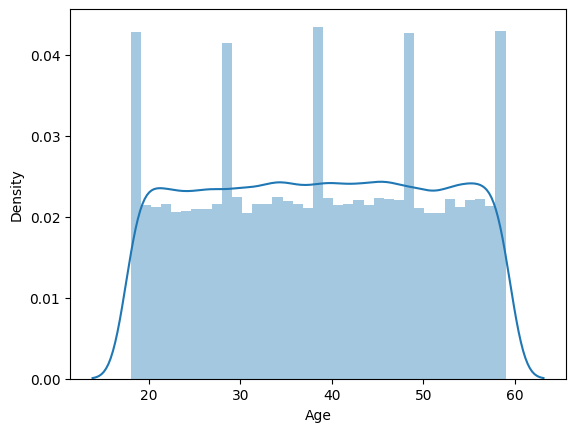

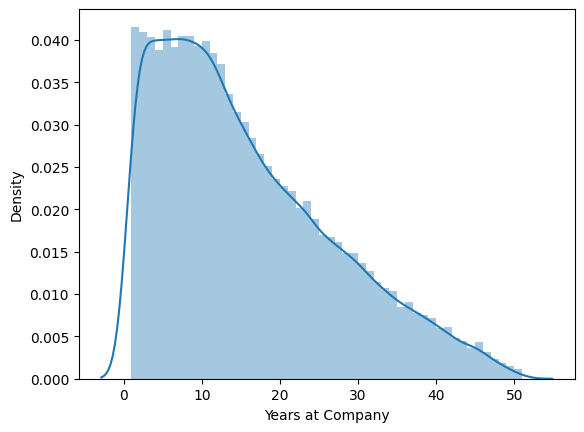

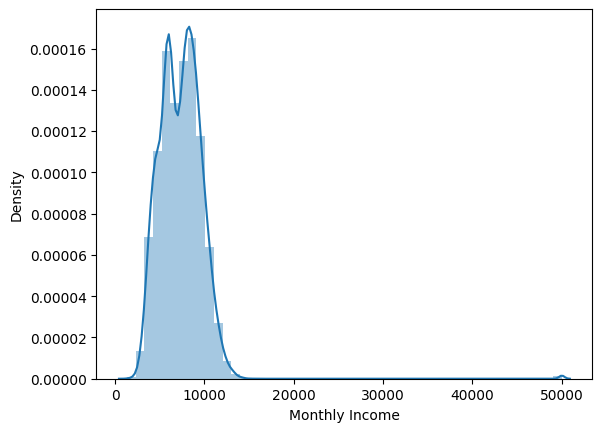

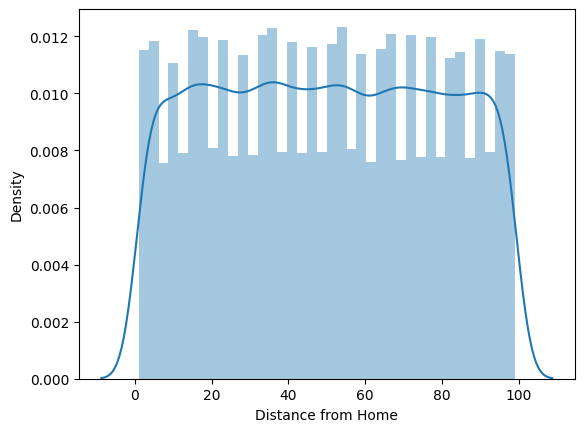

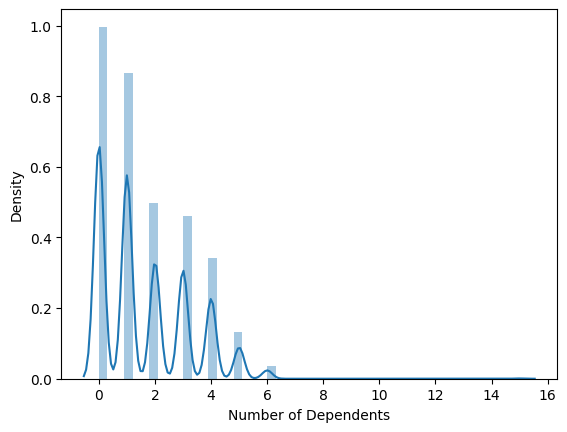

In [30]:
# ploting the Distribution of all numerical columns
for i in num_col:
  sns.distplot(x_train[i])
  plt.show()

### **4.2 Perform correlation analysis** <font color="red">[4 Marks]</font>

Check the correlation among different numerical variables.

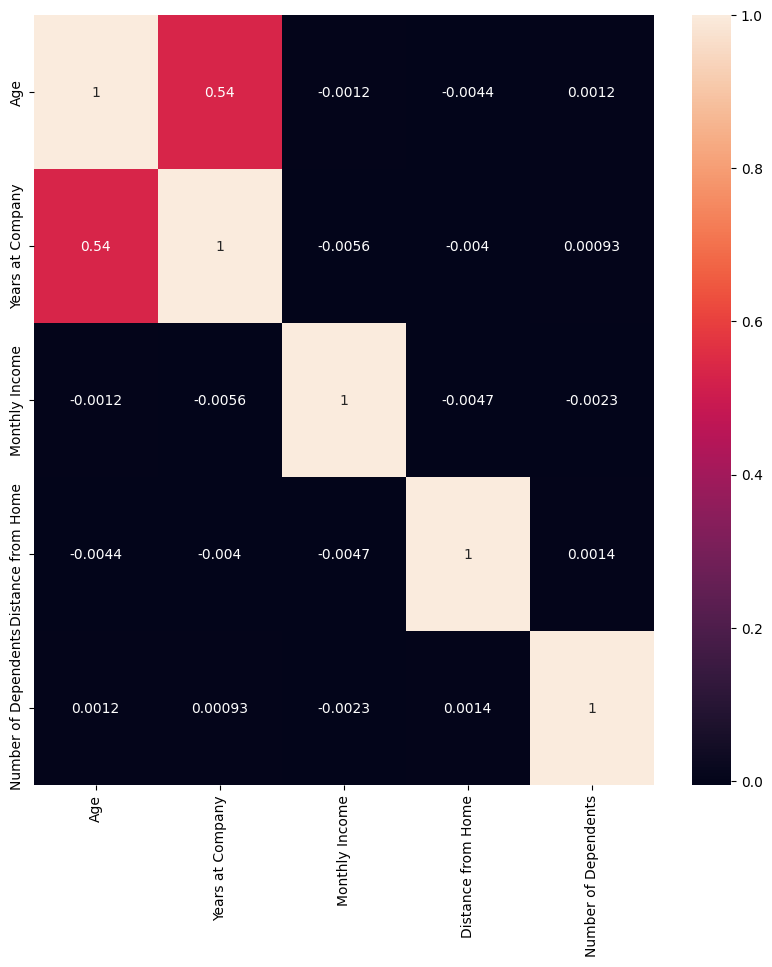

In [31]:
# Create correlation matrix for numerical columns
corr = x_train[num_col].corr()
# Plot Heatmap of the correlation matrix
plt.figure(figsize = (10,10))
sns.heatmap(corr,annot = True)
plt.show()

### **4.3 Check class balance** <font color="red">[2 Marks]</font>

Check the distribution of target variable in training set to check class balance.

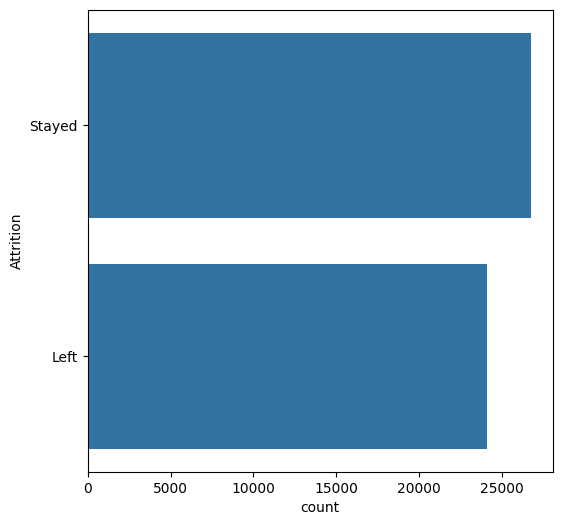

In [32]:
# Plot a bar chart to check class balance
plt.figure(figsize = (6,6))
sns.countplot(y_train)
plt.show()

### **4.4 Perform bivariate analysis** <font color="red">[8 Marks]</font>

Perform bivariate analysis on training data between all the categorical columns and target variable to  analyse how the categorical variables influence the target variable.

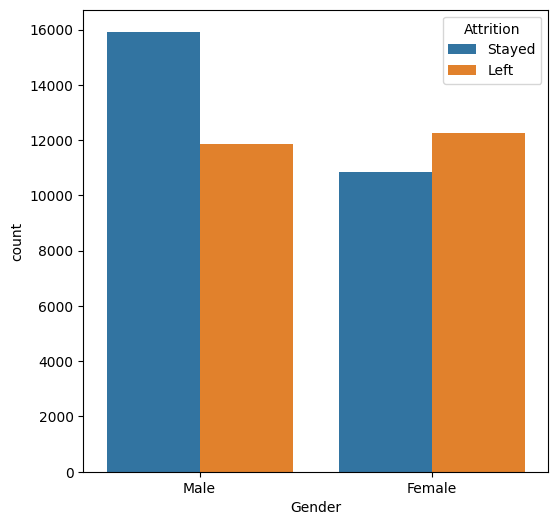

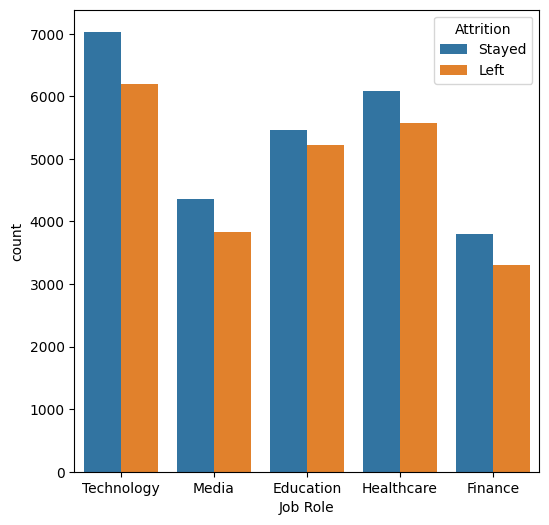

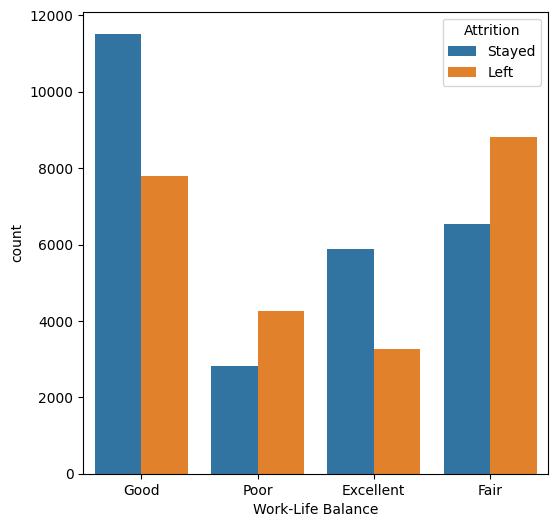

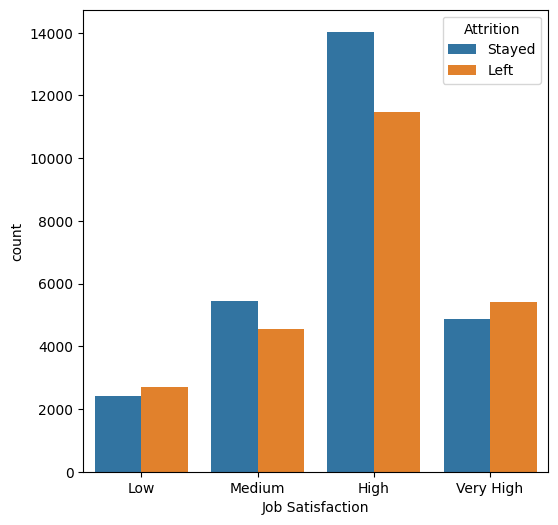

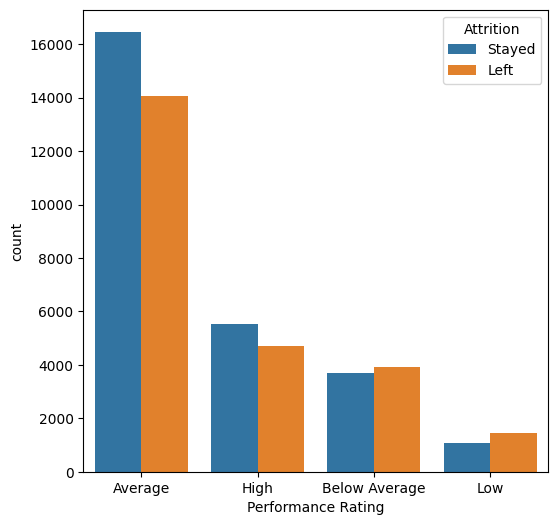

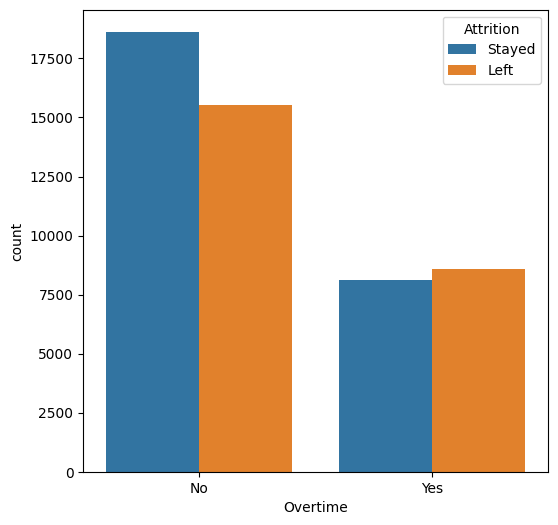

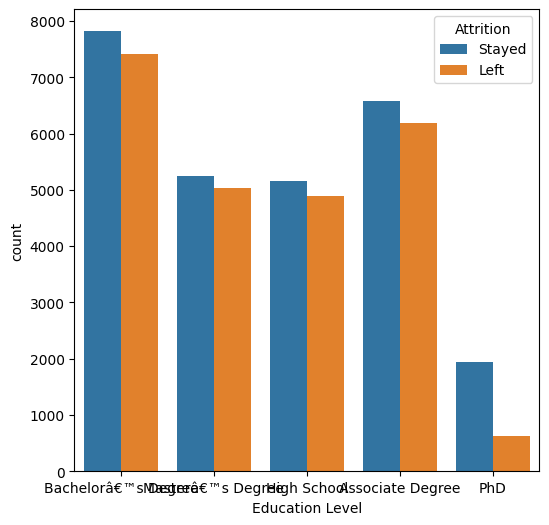

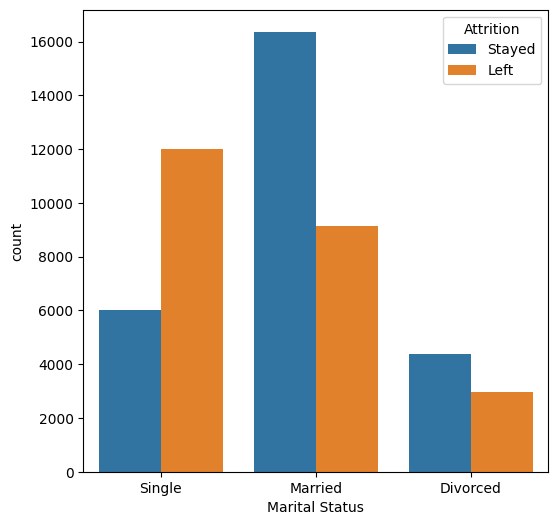

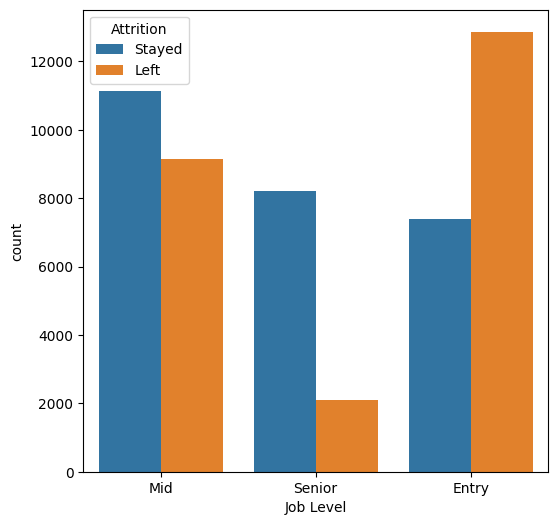

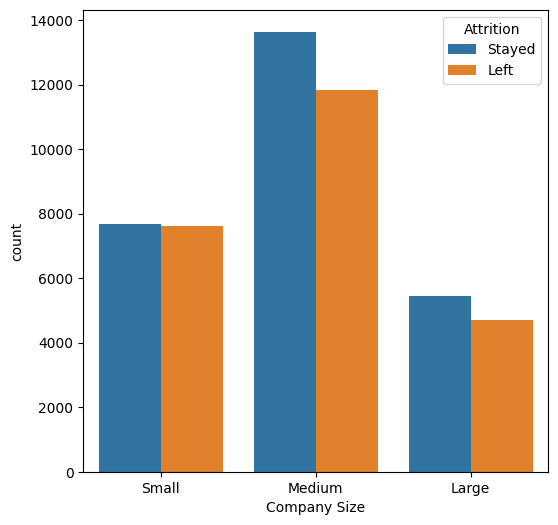

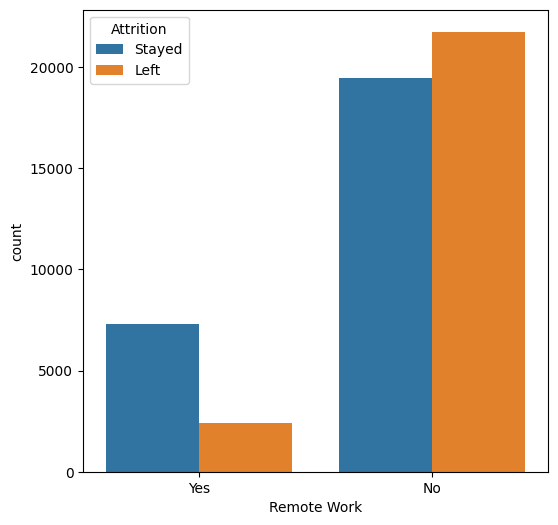

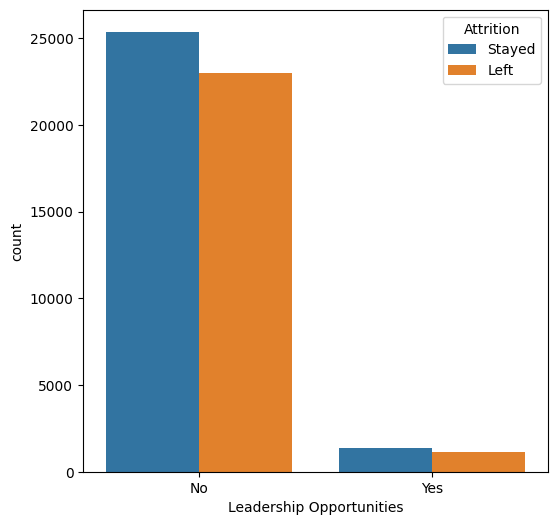

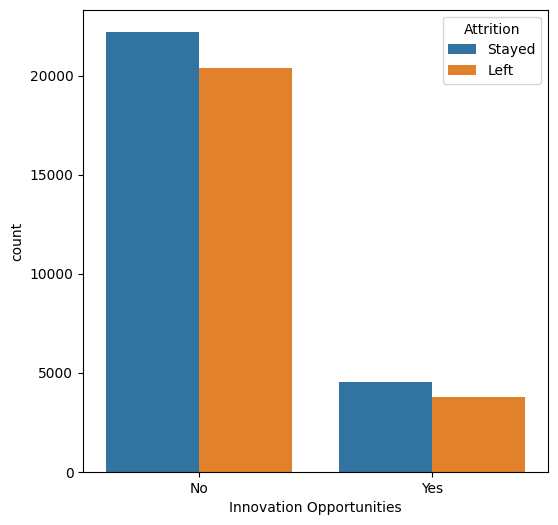

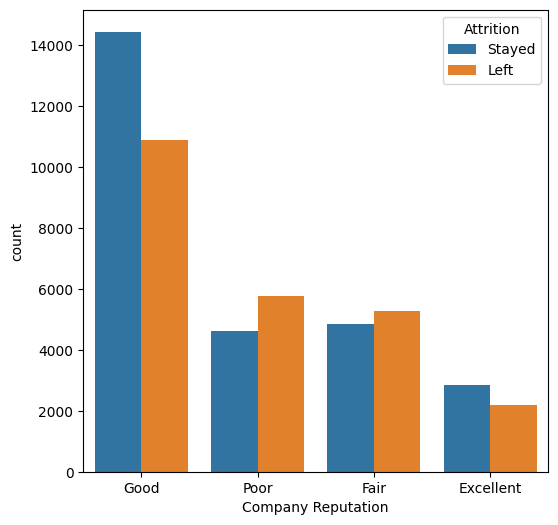

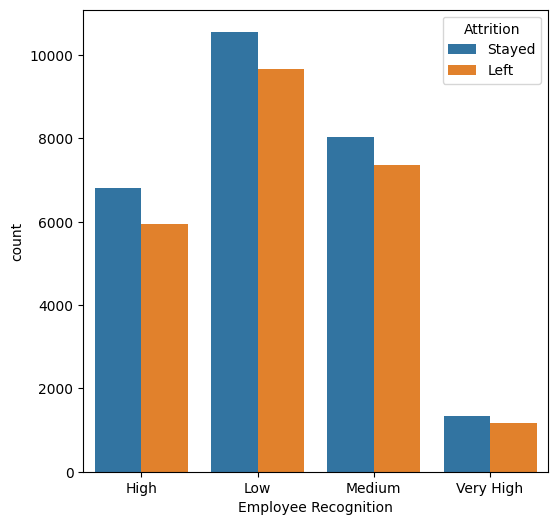

In [33]:
# Plot distribution for each categorical column with target variable
for i in x_train.select_dtypes(include = 'object').columns:
  plt.figure(figsize = (6,6))
  sns.countplot(x = i, hue = y_train, data = x_train)
  plt.show()

## **5. EDA on validation data** <font color = red>[OPTIONAL]</font>

### **5.1 Perform univariate analysis**

Perform univariate analysis on validation data for all the numerical columns.


5.1.1 Select numerical columns from validation data

In [34]:
# Select numerical columns
val_num_col = x_val.select_dtypes(include = 'number').columns
val_num_col

Index(['Age', 'Years at Company', 'Monthly Income', 'Distance from Home',
       'Number of Dependents'],
      dtype='object')

5.1.2 Plot distribution of numerical columns

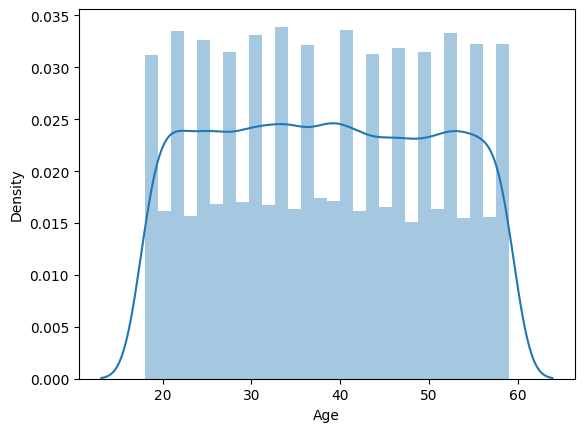

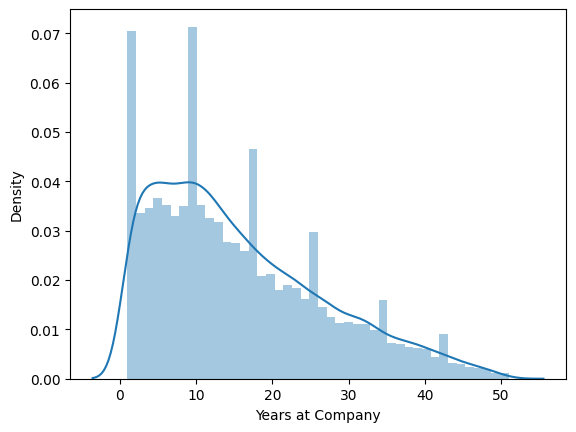

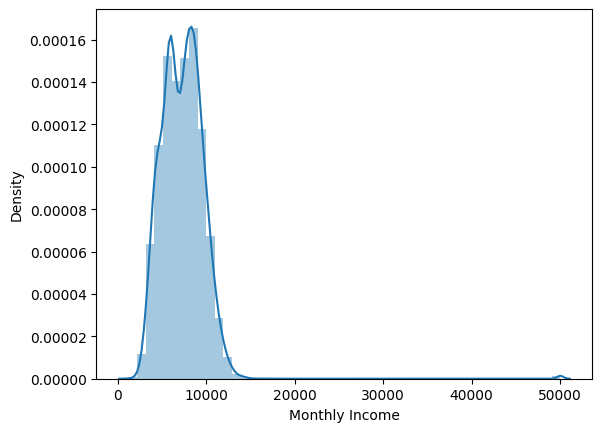

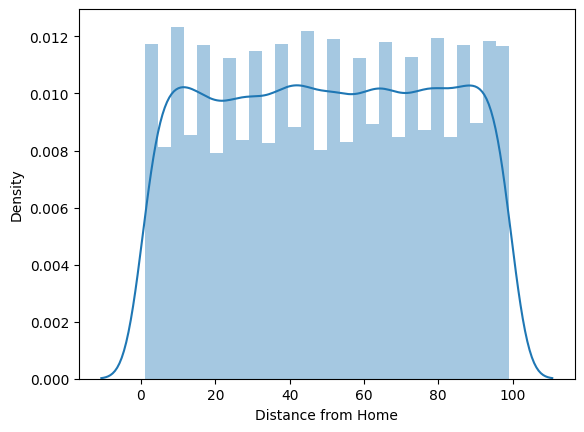

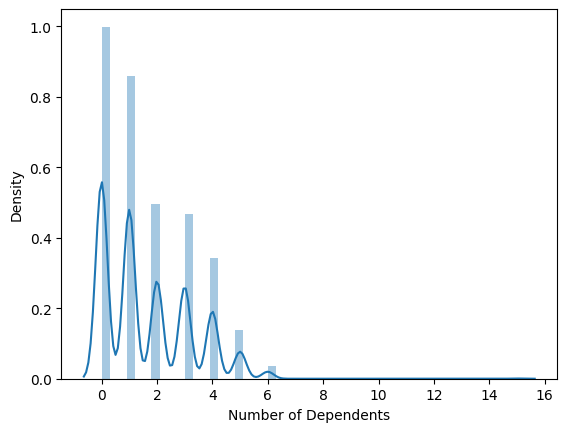

In [35]:
# Plot all the numerical columns to understand their distribution
for i in val_num_col:
  sns.distplot(x_val[i])
  plt.show()

### **5.2 Perform correlation analysis**

Check the correlation among different numerical variables.

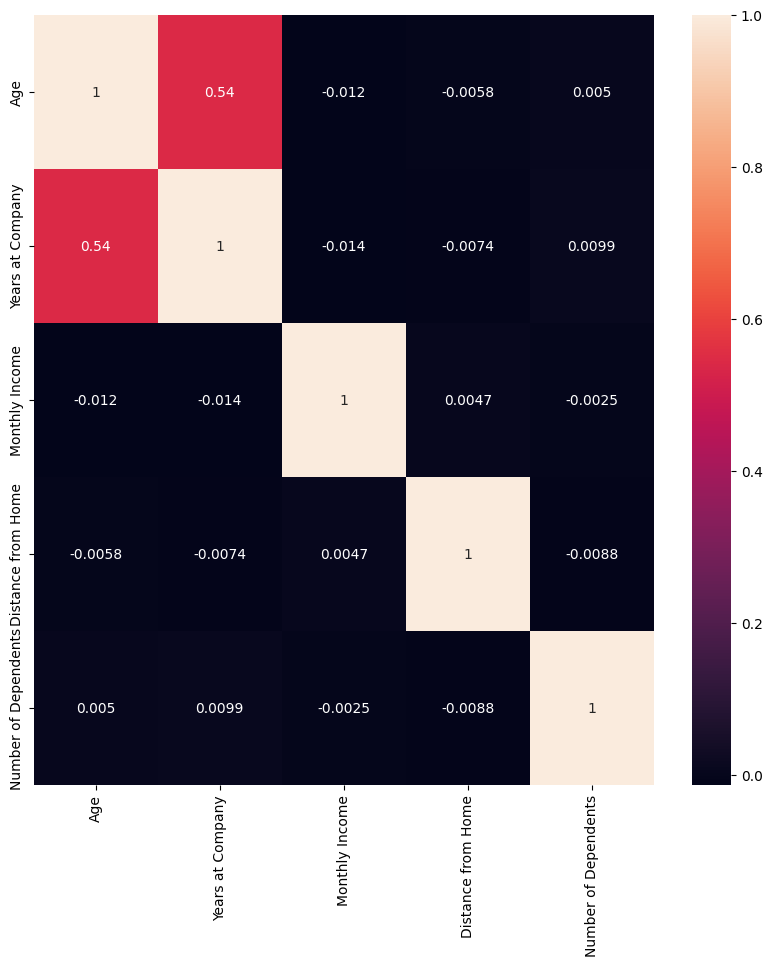

In [36]:
# Create correlation matrix for numerical columns
val_corr = x_val[val_num_col].corr()
# Plot Heatmap of the correlation matrix
plt.figure(figsize = (10,10))
sns.heatmap(val_corr, annot = True)
plt.show()

### **5.3 Check class balance**

Check the distribution of target variable in validation data to check class balance.

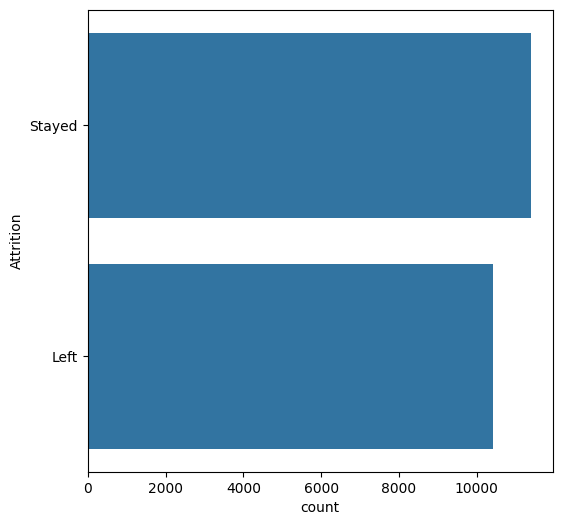

In [37]:
# Plot a bar chart to check class balance
plt.figure(figsize = (6,6))
sns.countplot(y_val)
plt.show()

### **5.4 Perform bivariate analysis**

Perform bivariate analysis on validation data between all the categorical columns and target variable to analyse how the categorical variables influence the target variable.

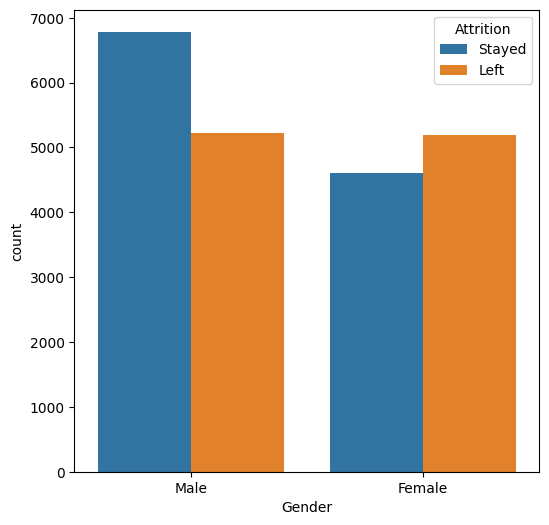

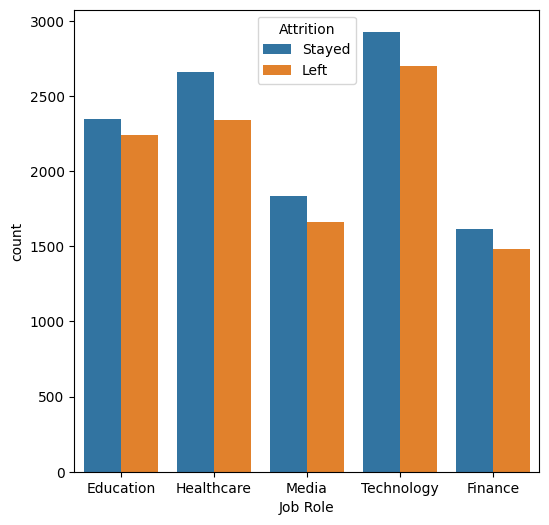

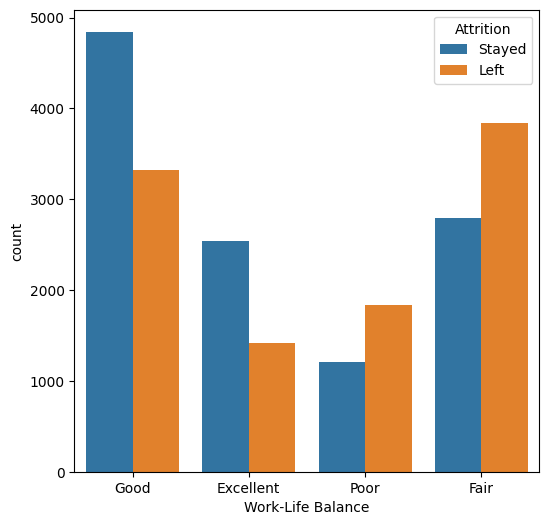

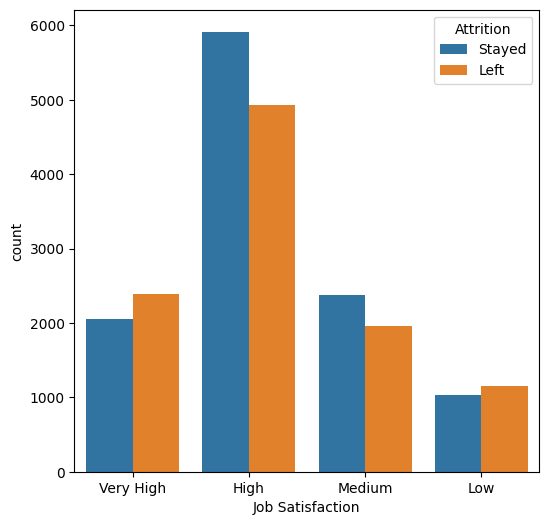

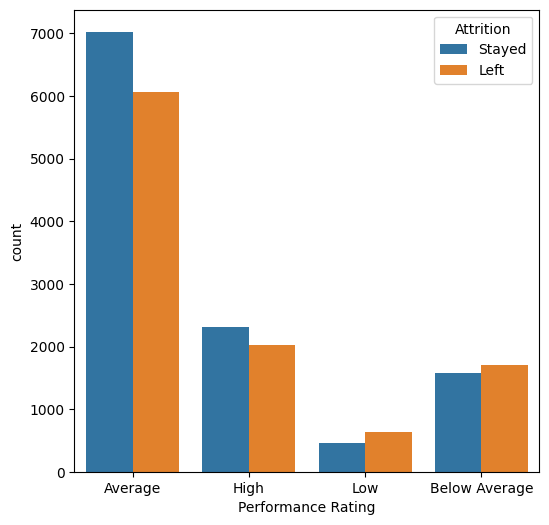

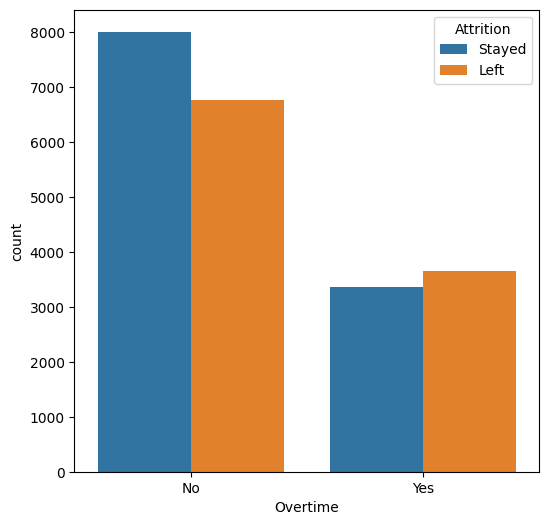

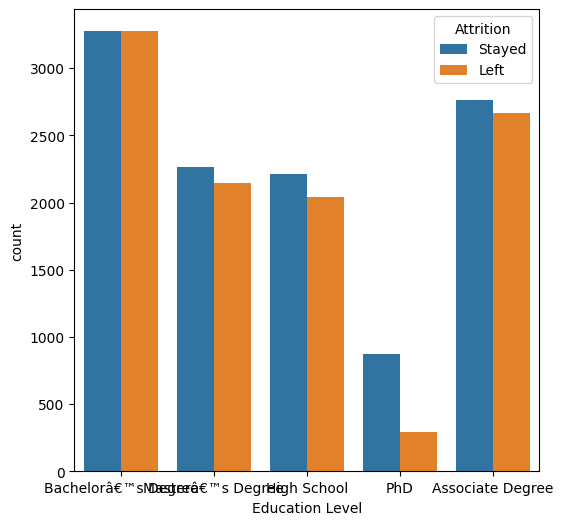

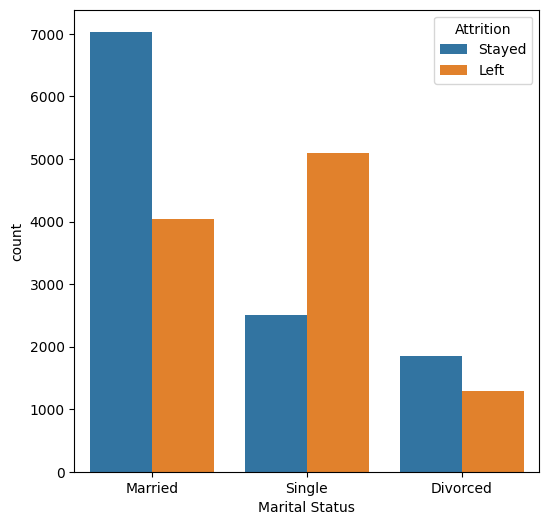

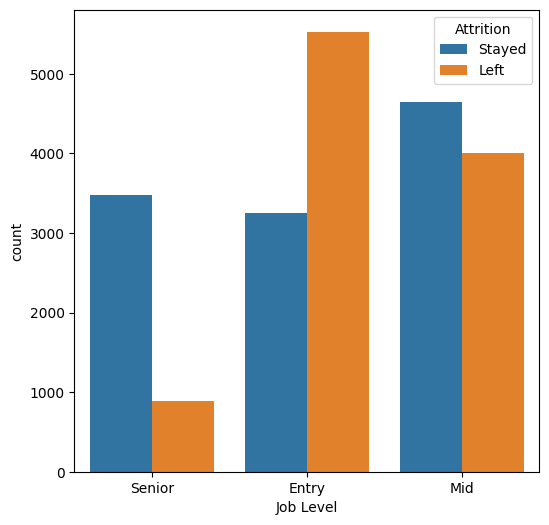

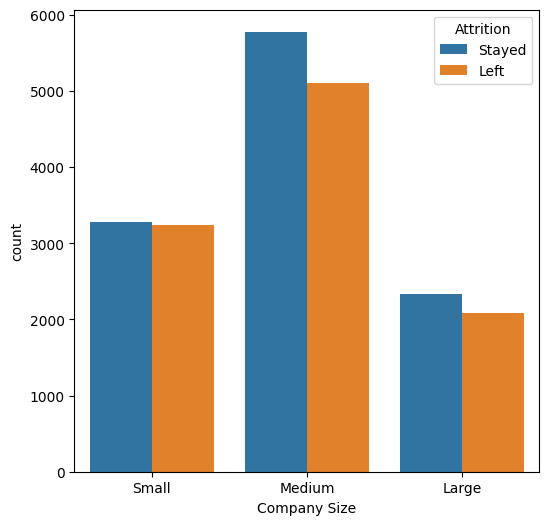

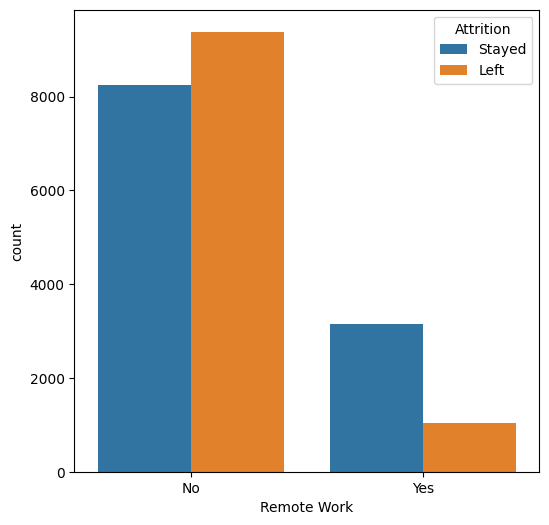

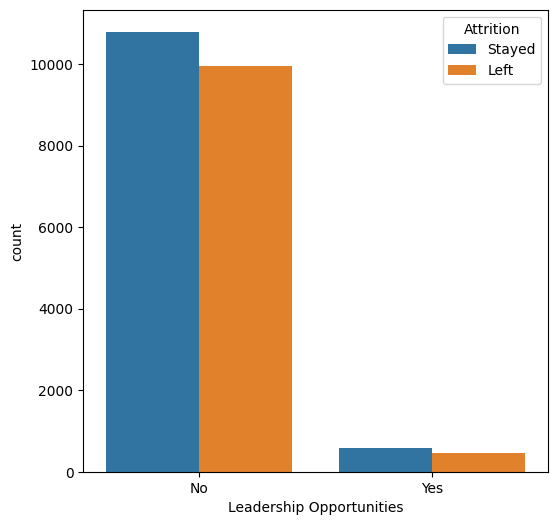

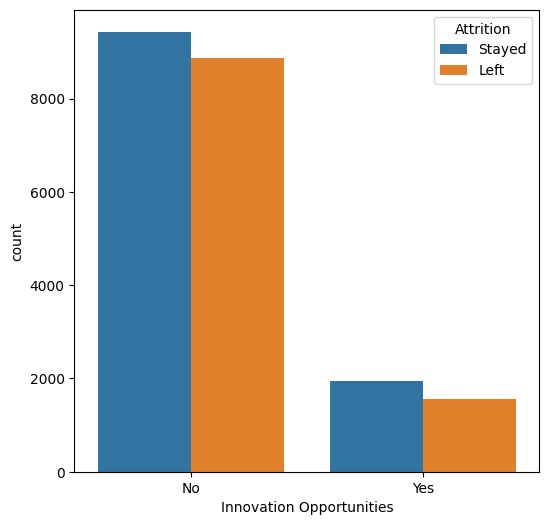

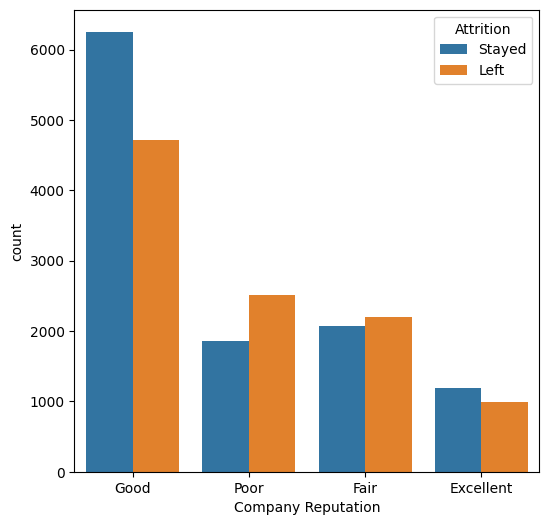

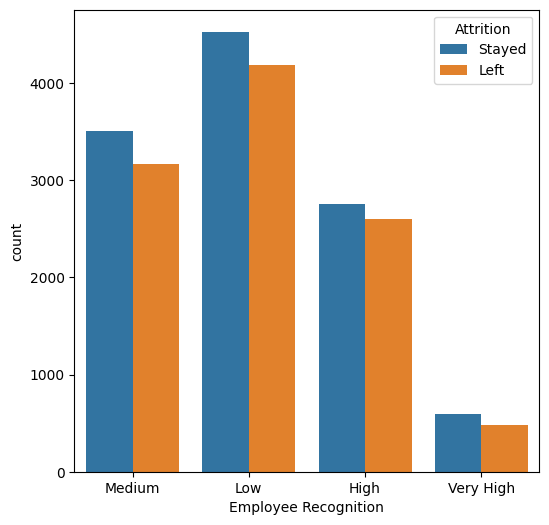

In [38]:
# Plot distribution for each categorical column with target variable
for i in x_val.select_dtypes(include = 'object').columns:
  plt.figure(figsize = (6,6))
  sns.countplot(x = i, hue = y_val, data = x_val)
  plt.show()

## **6. Feature Engineering** <font color = red>[20 marks]</font>

### **6.1 Dummy variable creation** <font color = red>[15 marks]</font>


The next step is to deal with the categorical variables present in the data.

6.1.1 Identify categorical columns where dummy variables are required <font color="red">[1 Mark]</font>

In [39]:
# Check the categorical columns
cat_cols = (emp_data_copy.drop("Attrition", axis =1)).select_dtypes(include = 'object').columns
cat_cols

Index(['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Overtime', 'Education Level', 'Marital Status',
       'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation',
       'Employee Recognition'],
      dtype='object')

6.1.2 Create dummy variables for independent columns in training set <font color="red">[3 Marks]</font>

In [40]:
# Create dummy variables using the 'get_dummies' for independent columns
dummy_variables = pd.get_dummies(x_train[cat_cols], drop_first= True).astype("int")
# Add the results to the master DataFrame
x_train=pd.concat([x_train,dummy_variables], axis =1)

In [41]:
x_train.head()

,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Overtime,Distance from Home,Education Level,Marital Status,Number of Dependents,Job Level,Company Size,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Gender_Male,Job Role_Finance,Job Role_Healthcare,Job Role_Media,Job Role_Technology,Work-Life Balance_Fair,Work-Life Balance_Good,Work-Life Balance_Poor,Job Satisfaction_Low,Job Satisfaction_Medium,Job Satisfaction_Very High,Performance Rating_Below Average,Performance Rating_High,Performance Rating_Low,Overtime_Yes,Education Level_Bachelorâ€™s Degree,Education Level_High School,Education Level_Masterâ€™s Degree,Education Level_PhD,Marital Status_Married,Marital Status_Single,Job Level_Mid,Job Level_Senior,Company Size_Medium,Company Size_Small,Remote Work_Yes,Leadership Opportunities_Yes,Innovation Opportunities_Yes,Company Reputation_Fair,Company Reputation_Good,Company Reputation_Poor,Employee Recognition_Low,Employee Recognition_Medium,Employee Recognition_Very High
40355,58,Male,5,Technology,9555,Good,Low,Average,No,79.0,Bachelorâ€™s Degree,Single,4,Mid,Small,Yes,No,No,Good,High,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0
8360,27,Male,2,Media,4709,Poor,Medium,Average,No,65.0,Masterâ€™s Degree,Married,1,Mid,Medium,No,No,No,Poor,Low,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,1,0,0
41040,52,Male,2,Education,4203,Excellent,Medium,High,Yes,7.0,Bachelorâ€™s Degree,Married,3,Senior,Small,No,No,No,Poor,High,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0
50228,39,Female,9,Media,5920,Good,High,Average,No,98.0,Masterâ€™s Degree,Single,0,Mid,Medium,No,No,No,Good,Low,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0
60999,27,Male,5,Healthcare,9393,Fair,High,Below Average,Yes,96.0,High School,Married,5,Mid,Medium,No,Yes,Yes,Good,Low,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,0


Now, drop the original categorical columns and check the DataFrame

In [42]:
# Drop the original categorical columns and check the DataFrame
x_train.drop(cat_cols, axis =1, inplace = True)
x_train.head()

,Age,Years at Company,Monthly Income,Distance from Home,Number of Dependents,Gender_Male,Job Role_Finance,Job Role_Healthcare,Job Role_Media,Job Role_Technology,Work-Life Balance_Fair,Work-Life Balance_Good,Work-Life Balance_Poor,Job Satisfaction_Low,Job Satisfaction_Medium,Job Satisfaction_Very High,Performance Rating_Below Average,Performance Rating_High,Performance Rating_Low,Overtime_Yes,Education Level_Bachelorâ€™s Degree,Education Level_High School,Education Level_Masterâ€™s Degree,Education Level_PhD,Marital Status_Married,Marital Status_Single,Job Level_Mid,Job Level_Senior,Company Size_Medium,Company Size_Small,Remote Work_Yes,Leadership Opportunities_Yes,Innovation Opportunities_Yes,Company Reputation_Fair,Company Reputation_Good,Company Reputation_Poor,Employee Recognition_Low,Employee Recognition_Medium,Employee Recognition_Very High
40355,58,5,9555,79.0,4,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0
8360,27,2,4709,65.0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,1,0,0
41040,52,2,4203,7.0,3,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0
50228,39,9,5920,98.0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0
60999,27,5,9393,96.0,5,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,0


6.1.3 Create dummy variables for independent columns in validation set <font color="red">[3 Marks]</font>

In [43]:
# Create dummy variables using the 'get_dummies' for independent columns
cat_val_dummies = pd.get_dummies(x_val[cat_cols], drop_first= True).astype("int")
# Add the results to the master DataFrame
x_val = pd.concat([x_val,cat_val_dummies], axis =1)

Now, drop the original categorical columns and check the DataFrame

In [44]:
# Drop categorical columns and check the DataFrame
x_val.drop(cat_cols, axis =1, inplace = True)
x_val.head()

,Age,Years at Company,Monthly Income,Distance from Home,Number of Dependents,Gender_Male,Job Role_Finance,Job Role_Healthcare,Job Role_Media,Job Role_Technology,Work-Life Balance_Fair,Work-Life Balance_Good,Work-Life Balance_Poor,Job Satisfaction_Low,Job Satisfaction_Medium,Job Satisfaction_Very High,Performance Rating_Below Average,Performance Rating_High,Performance Rating_Low,Overtime_Yes,Education Level_Bachelorâ€™s Degree,Education Level_High School,Education Level_Masterâ€™s Degree,Education Level_PhD,Marital Status_Married,Marital Status_Single,Job Level_Mid,Job Level_Senior,Company Size_Medium,Company Size_Small,Remote Work_Yes,Leadership Opportunities_Yes,Innovation Opportunities_Yes,Company Reputation_Fair,Company Reputation_Good,Company Reputation_Poor,Employee Recognition_Low,Employee Recognition_Medium,Employee Recognition_Very High
44052,48,33,5421,72.0,2,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0
40560,52,33,7927,61.0,3,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0
14811,39,12,7806,66.0,2,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0
59377,18,9,6217,47.0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1,1,0,0,0,1,1,0,0,1,0,0
31736,51,19,10203,86.0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0


6.1.4 Create DataFrame for dependent column in both training and validation set <font color = "red">[1 Mark]</font>

In [45]:
# Convert y_train and y_validation to DataFrame to create dummy variables
y_train = pd.DataFrame(y_train)
y_val = pd.DataFrame(y_val)

6.1.5 Create dummy variables for dependent column in training set <font color="red">[3 Marks]</font>

In [46]:
# Create dummy variables using the 'get_dummies' for dependent column
y_train = pd.get_dummies(y_train, drop_first= True).astype("int")


6.1.6 Create dummy variable for dependent column in validation set <font color = "red">[3 Marks]</font>

In [47]:
# Create dummy variables using the 'get_dummies' for dependent column
y_val = pd.get_dummies(y_val, drop_first= True).astype("int")

6.1.7 Drop redundant columns <font color="red">[1 Mark]</font>

In [48]:
# Drop redundant columns from both train and validation
# redundant columns have been dropped using drop_first parameter in the get_dummies function
# itself so skipping this step

### **6.2 Feature scaling** <font color = red>[5 marks]</font>

Apply feature scaling to the numeric columns to bring them to a common range and ensure consistent scaling.

6.2.1 Import required libraries <font color="red">[1 Mark]</font>

In [49]:
# Import the necessary scaling tool from scikit-learn
from sklearn.preprocessing import MinMaxScaler

6.2.2 Scale the numerical features <font color="red">[4 Marks]</font>

In [50]:
# Scale the numeric features present in the training set
MMS = MinMaxScaler()
x_train[num_col] = MMS.fit_transform(x_train[num_col])
# Scale the numerical features present in the validation set
x_val[val_num_col] = MMS.transform(x_val[val_num_col])

## **7. Model Building** <font color = red>[40 marks]</font>

### **7.1 Feature selection** <font color = red>[5 marks]</font>

As there are a lot of variables present in the data, Recursive Feature Elimination (RFE) will be used to select the most influential features for building the model.

7.1.1 Import required libraries <font color="red">[1 Mark]</font>

In [51]:
# Import 'LogisticRegression' and create a LogisticRegression object
from sklearn.linear_model import LogisticRegression

Log_reg = LogisticRegression()

7.1.2 Import RFE  and select 15 variables <font color="red">[3 Mark]</font>

In [52]:
# Import RFE and select 15 variables
from sklearn.feature_selection import RFE
rfe = RFE(estimator = Log_reg,
            n_features_to_select = 15,
          verbose = True)

rfe.fit(x_train, y_train)

Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.


RFE(estimator=LogisticRegression(), n_features_to_select=15, verbose=True)

In [53]:
# Display the features selected by RFE
x_train.columns[rfe.get_support()]

Index(['Years at Company', 'Distance from Home', 'Number of Dependents',
       'Gender_Male', 'Work-Life Balance_Fair', 'Work-Life Balance_Poor',
       'Job Satisfaction_Low', 'Performance Rating_Low', 'Education Level_PhD',
       'Marital Status_Single', 'Job Level_Mid', 'Job Level_Senior',
       'Remote Work_Yes', 'Company Reputation_Fair',
       'Company Reputation_Poor'],
      dtype='object')

7.1.3 Store the selected features <font color="red">[1 Mark]</font>




In [54]:
# Put columns selected by RFE into variable 'col'
col = x_train.columns[rfe.get_support()]
col

Index(['Years at Company', 'Distance from Home', 'Number of Dependents',
       'Gender_Male', 'Work-Life Balance_Fair', 'Work-Life Balance_Poor',
       'Job Satisfaction_Low', 'Performance Rating_Low', 'Education Level_PhD',
       'Marital Status_Single', 'Job Level_Mid', 'Job Level_Senior',
       'Remote Work_Yes', 'Company Reputation_Fair',
       'Company Reputation_Poor'],
      dtype='object')

### **7.2 Building Logistic Regression Model** <font color = red>[20 marks]</font>

Now that you have selected the variables through RFE, use these features to build a logistic regression model with statsmodels. This will allow you to assess the statistical aspects, such as p-values and VIFs, which are important for checking multicollinearity and ensuring that the predictors are not highly correlated with each other, as this could distort the model's coefficients.

7.2.1 Select relevant columns on training set <font color="red">[1 Mark]</font>

In [75]:
# Select only the columns selected by RFE
model_training_df = x_train[col]
model_training_df.columns

Index(['Years at Company', 'Distance from Home', 'Number of Dependents',
       'Gender_Male', 'Work-Life Balance_Fair', 'Work-Life Balance_Poor',
       'Job Satisfaction_Low', 'Performance Rating_Low', 'Education Level_PhD',
       'Marital Status_Single', 'Job Level_Mid', 'Job Level_Senior',
       'Remote Work_Yes', 'Company Reputation_Fair',
       'Company Reputation_Poor'],
      dtype='object')

In [76]:
# View the training data
model_training_df.shape

(50888, 15)

7.2.2 Add constant to training set <font color = "red">[1 Mark]</font>

In [77]:
# Import statsmodels and add constant to training set
import statsmodels.api as sm

xtrain_sm = sm.add_constant(model_training_df)

7.2.3 Fit logistic regression model <font color="red">[3 Marks]</font>

In [78]:
# Fit a logistic regression model on X_train after adding a constant and output the summary
logit_model = sm.Logit(y_train, xtrain_sm)
result= model.fit()

# summary
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.498268
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:       Attrition_Stayed   No. Observations:                50888
Model:                          Logit   Df Residuals:                    50872
Method:                           MLE   Df Model:                           15
Date:                Mon, 28 Jul 2025   Pseudo R-squ.:                  0.2798
Time:                        13:32:43   Log-Likelihood:                -25356.
converged:                       True   LL-Null:                       -35206.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.0359      0.037     -0.975      0.330      -0.108   

**Model Interpretation**

The output summary table  will provide the features used for building model along with coefficient of each of the feature and their p-value. The p-value in a logistic regression model is used to assess the statistical significance of each coefficient. Lesser the p-value, more significant the feature is in the model.

A positive coefficient will indicate that an increase in the value of feature would increase the odds of the event occurring. On the other hand, a negative coefficient means the opposite, i.e,  an increase in the value of feature would decrease the odds of the event occurring.



7.2.4 Evaluate VIF of features <font color="red">[3 Marks]</font>

In [79]:
# Import 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [80]:
# Make a VIF DataFrame for all the variables present
vif_dataframe = pd.DataFrame()
vif_dataframe["Features"] = xtrain_sm.columns
vif_dataframe["VIF"] = [variance_inflation_factor(xtrain_sm.values, i) for i in range(xtrain_sm.shape[1])]

In [81]:
vif_dataframe.sort_values("VIF", ascending = False)

,Features,VIF
0,const,11.930415
11,Job Level_Mid,1.203851
12,Job Level_Senior,1.203743
6,Work-Life Balance_Poor,1.075553
5,Work-Life Balance_Fair,1.075288
14,Company Reputation_Fair,1.068317
15,Company Reputation_Poor,1.068066
4,Gender_Male,1.000433
7,Job Satisfaction_Low,1.000317
8,Performance Rating_Low,1.000317


In [82]:
p_values = result.pvalues.rename('p_value')

vif_dataframe = pd.merge(vif_dataframe,p_values, left_on="Features", right_index=True)
vif_dataframe.sort_values('p_value', ascending = False)

,Features,VIF,p_value
0,const,11.930415,3.296281e-01
8,Performance Rating_Low,1.000317,5.317120e-26
7,Job Satisfaction_Low,1.000317,5.414360e-28
1,Years at Company,1.000263,3.258197e-68
14,Company Reputation_Fair,1.068317,8.211632e-78
3,Number of Dependents,1.000178,5.371759e-87
2,Distance from Home,1.000295,2.892847e-138
15,Company Reputation_Poor,1.068066,1.308312e-151
4,Gender_Male,1.000433,1.571906e-161
9,Education Level_PhD,1.000300,1.782508e-176


Proceed to the next step if p-values and VIFs are within acceptable ranges.  If you observe high p-values or VIFs, create new cells to drop the features and retrain the model.

7.2.5 Make predictions on training set <font color = "red">[2 Marks]</font>

In [86]:
# Predict the probabilities on the training set
y_train_pred_prob = result.predict(xtrain_sm)

7.2.6 Format the prediction output <font color="red">[1 Mark]</font>

In [87]:
# Reshape it into an array
y_train_pred_prob = y_train_pred_prob.values.reshape(-1)

7.2.7 Create a DataFrame with the actual stayed flag and the predicted probabilities <font color="red">[1 Mark]</font>

In [88]:
# Create a new DataFrame containing the actual stayed flag and the probabilities predicted by the model
pred_df = pd.DataFrame({'Actual':y_train.iloc[:,0], 'Predicted_prob':y_train_pred_prob})

7.2.8 Create a new column 'Predicted' with 1 if predicted probabilities are greater than 0.5 else 0 <font color = "red">[1 Mark]</font>

In [89]:
# Create a new column 'Predicted' with 1 if predicted probabilities are greater than 0.5 else 0
pred_df['Predicted'] = pred_df.Predicted_prob.map(lambda x: 1 if x > 0.5 else 0)

**Evaluation of performance of Model**

Evaluate the performance of the model based on the predictions made on the training set.


7.2.9 Check the accuracy of the model based on the predictions made on the training set <font color = "red">[1 Mark]</font>

In [90]:
# Import metrics from sklearn for evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score

# Check the overall accuracy
accuracy_score(pred_df.Actual, pred_df.Predicted)

0.7436330765602892

7.2.10 Create a confusion matrix based on the predictions made on the training set <font color="red">[1 mark]</font>

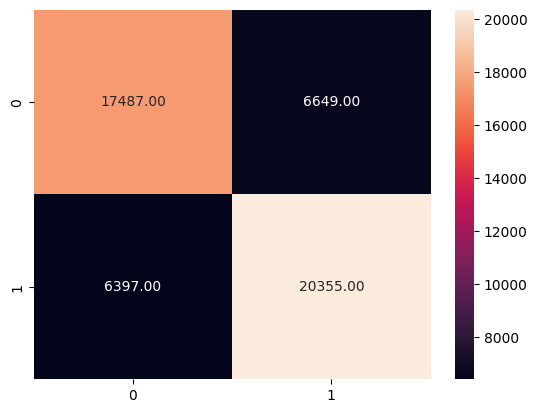

In [92]:
# Create confusion matrix
confu_mat = confusion_matrix(pred_df.Actual, pred_df.Predicted)
sns.heatmap(confu_mat, annot = True, fmt = ".2f")
plt.show()

7.2.11 Create variables for true positive, true negative, false positive and false negative <font color="red">[1 Mark]</font>

In [93]:
# Create variables for true positive, true negative, false positive and false negative
true_positive = confu_mat[0][0]
true_negative = confu_mat[1][1]
false_positive = confu_mat[0][1]
false_negative = confu_mat[1][0]

7.2.12 Calculate sensitivity and specificity of model  <font color="red">[2 Marks]</font>

In [94]:
# Calculate sensitivity
sens = true_positive/(true_positive + false_negative)
sens

np.float64(0.7321637916596885)

In [95]:
# Calculate specificity
spec = true_negative/(true_negative + false_positive)
spec

np.float64(0.7537772181898978)

7.2.13 Calculate precision and recall of model <font color="red">[2 Marks]</font>

In [98]:
# Calculate precision
precision = precision_score(pred_df.Actual, pred_df.Predicted)
precision

0.7537772181898978

In [99]:
# Calculate recall
recall = recall_score(pred_df.Actual, pred_df.Predicted)
recall


0.7608776913875598

### **7.3 Find the optimal cutoff** <font color = red>[15 marks]</font>

Find the optimal cutoff to improve model performance. While a default threshold of 0.5 was used for initial evaluation, optimising this threshold can enhance the model's performance.

First, plot the ROC curve and check AUC.



7.3.1 Plot ROC curve <font color="red">[3 Marks]</font>

In [107]:
# Define ROC function
from sklearn.metrics import roc_curve, auc
def plot_roc_curve(y_true , y_pred):
  """
    Plots ROC curve and prints AUC score.

    Parameters:
    y_true (array-like): True binary labels (0 or 1)
    y_pred_prob (array-like): Predicted probabilities (from model)
  """


  fpr, tpr, thresholds = roc_curve(y_true, y_pred)
  roc_auc = auc(fpr, tpr)
  plt.figure()
  plt.plot(fpr, tpr, color='orange', label='ROC')
  plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic (ROC) Curve')
  plt.grid(True)
  plt.legend()
  plt.show()


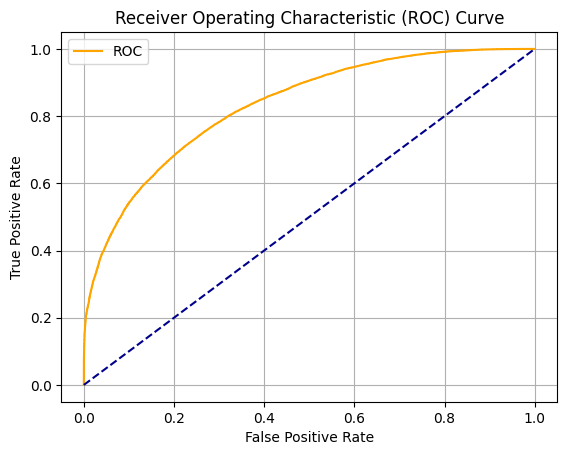

In [157]:
# Call the ROC function
plot_roc_curve(y_pred= pred_df.Predicted_prob,
               y_true = pred_df.Actual)

**Sensitivity and Specificity tradeoff**

Check sensitivity and specificity tradeoff to find the optimal cutoff point.

7.3.2 Predict on training set at various probability cutoffs <font color="red">[1 Mark]</font>

In [127]:
# Predict on training data by creating columns with different probability cutoffs to explore the impact of cutoff on model performance
cutoffs = [.3,.4,.5,.6,.7]
for cutoff in cutoffs:
  pred_df[f"cutoff{cutoff}"] = pred_df.Predicted_prob.map(lambda x: 1 if x > cutoff else 0)
pred_df["Predicted"].rename("Predicted_cutoff_0.5", inplace = True)


,Predicted_cutoff_0.5
40355,1
8360,0
41040,1
50228,0
60999,1
...,...
38179,1
6675,1
56240,0
1270,0


In [128]:
pred_df

,Actual,Predicted_prob,Predicted,cutoff0.3,cutoff0.4,cutoff0.6,cutoff0.7,cutoff0.5
40355,1,0.739138,1,1,1,1,1,1
8360,1,0.281596,0,0,0,0,0,0
41040,1,0.939555,1,1,1,1,1,1
50228,0,0.173144,0,0,0,0,0,0
60999,1,0.578070,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...
38179,1,0.744340,1,1,1,1,1,1
6675,1,0.970114,1,1,1,1,1,1
56240,0,0.046831,0,0,0,0,0,0
1270,0,0.034551,0,0,0,0,0,0


7.3.3 Plot for accuracy, sensitivity, specificity at different probability cutoffs <font color="red">[2 Marks]</font>

In [134]:
# Create a DataFrame to see the values of accuracy, sensitivity, and specificity at different values of probability cutoffs
metric_dict= {"cutoffs":[],
              "Accuracy":[],
              "Sensitivity": [],
              "Specificiity":[]}
for cutoff in cutoffs:
  metric_dict["cutoffs"].append(cutoff)
  metric_dict["Accuracy"].append(accuracy_score(pred_df.Actual, pred_df[f"cutoff{cutoff}"]))
  metric_dict["Sensitivity"].append(recall_score(pred_df.Actual, pred_df[f"cutoff{cutoff}"]))
  con_mat = confusion_matrix(pred_df.Actual, pred_df[f"cutoff{cutoff}"])
  true_positive = con_mat[0][0]
  true_negative = con_mat[1][1]
  false_positive = con_mat[0][1]
  false_negative = con_mat[1][0]
  metric_dict["Specificiity"].append(true_negative/(true_negative + false_positive))

In [135]:
metrics_df = pd.DataFrame(metric_dict)
metrics_df

,cutoffs,Accuracy,Sensitivity,Specificiity
0,0.3,0.712015,0.909054,0.665526
1,0.4,0.736107,0.842068,0.709937
2,0.5,0.743633,0.760878,0.753777
3,0.6,0.736126,0.665184,0.799201
4,0.7,0.714137,0.552295,0.851830


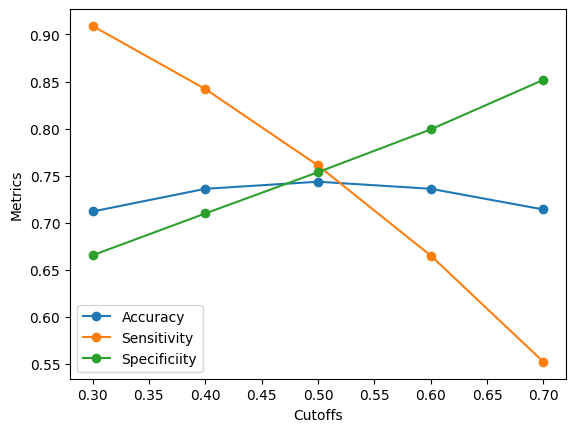

In [136]:
# Plot accuracy, sensitivity, and specificity at different values of probability cutoffs
plt.plot('cutoffs', 'Accuracy', data = metrics_df, marker = 'o')
plt.plot('cutoffs','Sensitivity', data = metrics_df, marker = 'o')
plt.plot('cutoffs', 'Specificiity', data = metrics_df, marker = 'o')
plt.xlabel("Cutoffs")
plt.ylabel("Metrics")
plt.legend()
plt.show()

7.3.4 Create a column for final prediction based on the optimal cutoff <font color="red">[2 Marks]</font>

In [137]:
# Create a column for final prediction based on the optimal cutoff
# the final column will be the one we choose intutively ie. 0.5 so the Predicted is the one of final cutoff

7.3.5 Calculate model's accuracy <font color="red">[1Mark]</font>

In [139]:
# Calculate the accuracy
accuracy_score(pred_df.Actual, pred_df.Predicted)

0.7436330765602892

7.3.6 Create confusion matrix <font color="red">[1Mark]</font>

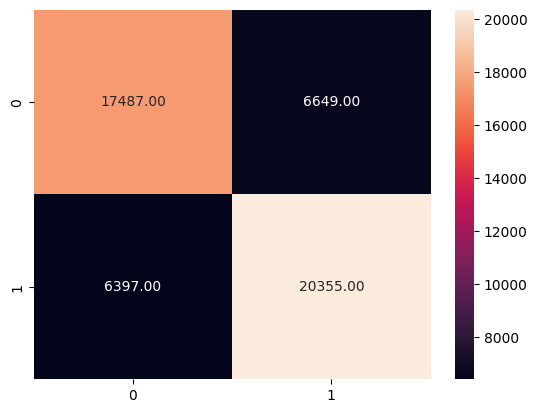

In [141]:
# Create the confusion matrix once again
Confusion_matrix = confusion_matrix(pred_df.Actual, pred_df.Predicted)
sns.heatmap(Confution_matrix, annot = True, fmt = ".2f")
plt.show()

7.3.7 Create variables for true positive, true negative, false positive and false negative <font color="red">[1Mark]</font>

In [143]:
# Create variables for true positive, true negative, false positive and false negative
true_positve = Confusion_matrix[0][0]
true_negative = Confusion_matrix[1][1]
false_positive = Confusion_matrix[0][1]
false_negative = Confusion_matrix[1][0]

7.3.8 Calculate sensitivity and specificity of the model <font color="red">[1Mark]</font>

In [144]:
# Calculate Sensitivity
sensitivity = true_positive/(true_positive + false_negative)
sensitivity

np.float64(0.77123341558488)

In [145]:
# Calculate Specificity
Specificity = true_negative/(true_negative + false_positive)
Specificity

np.float64(0.7537772181898978)

7.3.9 Calculate precision and recall of the model <font color="red">[1Mark]</font>

In [146]:
# Calculate Precision
precision = precision_score(pred_df.Actual, pred_df.Predicted)
precision

0.7537772181898978

In [147]:
# Calculate Recall
recall = recall_score(pred_df.Actual, pred_df.Predicted)
recall

0.7608776913875598

**Precision and Recall tradeoff**

Check optimal cutoff value by plotting precision-recall curve, and adjust the cutoff based on the precision and recall tradeoff if required.

In [151]:
# Import precision-recall curve function
from sklearn.metrics import precision_recall_curve, average_precision_score

In [150]:
# Check actual and predicted values from initial model
pred_df[["Actual", "Predicted"]]

,Actual,Predicted
40355,1,1
8360,1,0
41040,1,1
50228,0,0
60999,1,1
...,...,...
38179,1,1
6675,1,1
56240,0,0
1270,0,0


7.3.10 Plot precision-recall curve <font color="red">[2 Marks]</font>

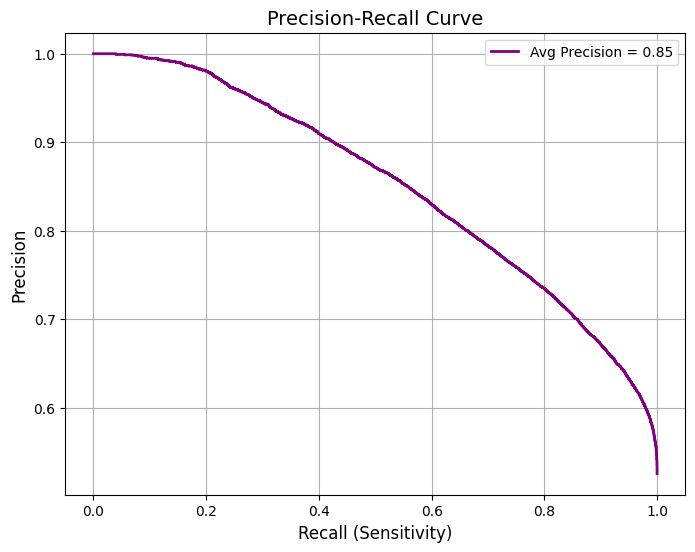

In [154]:
# Plot precision-recall curve
precision, recall, thresholds = precision_recall_curve(pred_df.Actual, pred_df.Predicted_prob)
avg_precision = average_precision_score(pred_df.Actual, pred_df.Predicted_prob)


plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='purple', lw=2, label=f'Avg Precision = {avg_precision:.2f}')
plt.xlabel('Recall (Sensitivity)', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.title('Precision-Recall Curve', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

## **8. Prediction and Model Evaluation** <font color = red>[30 marks]</font>

Use the model from the previous step to make predictions on the validation set with the optimal cutoff. Then evaluate the model's performance using metrics such as accuracy, sensitivity, specificity, precision, and recall.

### **8.1 Make predictions over validation set** <font color = red>[15 marks]</font>

8.1.1 Select relevant features for validation set <font color="red">[2 Marks]</font>



In [158]:
# Select the relevant features for validation set
x_val = x_val[col]

8.1.2 Add constant to X_validation <font color="red">[2 Marks]</font>

In [159]:
# Add constant to X_validation
x_val_sm = sm.add_constant(x_val)

8.1.3 Make predictions over validation set <font color="red">[3 Marks]</font>

In [160]:
# Make predictions on the validation set and store it in the variable 'y_validation_pred'
y_validation_pred = result.predict(x_val_sm)
# View predictions
y_validation_pred

,0
44052,0.962509
40560,0.179952
14811,0.467769
59377,0.906619
31736,0.178586
...,...
50667,0.048784
64658,0.829293
32069,0.218272
48877,0.273091


8.1.4 Create DataFrame with actual values and predicted values for validation set <font color="red">[5 Marks]</font>

In [167]:
# Convert 'y_validation_pred' to a DataFrame 'predicted_probability'
predicted_probability = pd.DataFrame(y_validation_pred, columns = ["Predicted_prob"])

# Convert 'y_validation' to DataFrame 'actual'
actual = y_val.reset_index(drop = True)

# Remove index from both DataFrames 'actual' and 'predicted_probability' to append them side by side
predicted_probability.reset_index(drop = True, inplace = True)
actual.reset_index(drop = True, inplace = True)
actual.columns = ["Actual"]

val_pred = pd.concat([actual, predicted_probability], axis = 1)
val_pred

,Actual,Predicted_prob
0,1,0.962509
1,0,0.179952
2,1,0.467769
3,1,0.906619
4,0,0.178586
...,...,...
21805,0,0.048784
21806,1,0.829293
21807,1,0.218272
21808,0,0.273091


8.1.5 Predict final prediction based on the cutoff value <font color="red">[3 Marks]</font>

In [168]:
# Make predictions on the validation set using the optimal cutoff and store it in a column 'final_prediction'
val_pred["final_prediction"] = val_pred.Predicted_prob.map(lambda x: 1 if x > 0.5 else 0)
# Check the DataFrame
val_pred

,Actual,Predicted_prob,final_prediction
0,1,0.962509,1
1,0,0.179952,0
2,1,0.467769,0
3,1,0.906619,1
4,0,0.178586,0
...,...,...,...
21805,0,0.048784,0
21806,1,0.829293,1
21807,1,0.218272,0
21808,0,0.273091,0


### **8.2 Calculate accuracy of the model** <font color = red>[2 marks]</font>

In [169]:
# Calculate the overall accuracy
accuracy_score(val_pred.Actual, val_pred.final_prediction)

0.743924805135259

### **8.3 Create confusion matrix and create variables for true positive, true negative, false positive and false negative** <font color = red>[5 marks]</font>

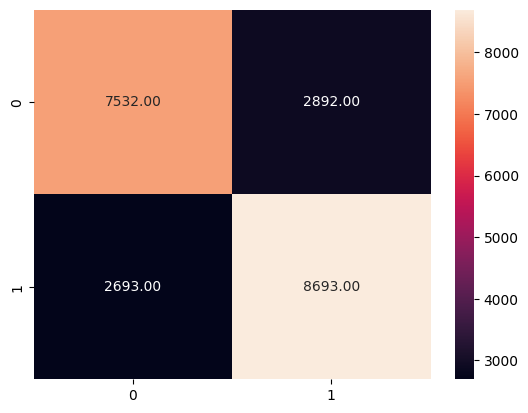

In [170]:
# Create confusion matrix
val_conf_mat = confusion_matrix(val_pred.Actual, val_pred.final_prediction)
sns.heatmap(val_conf_mat, annot = True, fmt = ".2f")
plt.show()

In [171]:
# Create variables for true positive, true negative, false positive and false negative
true_positive = val_conf_mat[0][0]
true_negative = val_conf_mat[1][1]
false_positive = val_conf_mat[0][1]
false_negative = val_conf_mat[1][0]

### **8.4 Calculate sensitivity and specificity** <font color = red>[4 marks]</font>

In [172]:
# Calculate sensitivity
val_sensitivity = true_positive/(true_positive + false_negative)
val_sensitivity

np.float64(0.7366259168704157)

In [173]:
# Calculate specificity
val_specifictiy = true_negative/(true_negative + false_positive)
val_specifictiy

np.float64(0.7503668536901166)

### **8.5 Calculate precision and recall** <font color = red>[4 marks]</font>

In [176]:
# Calculate precision
print(f"Validation Precision Score: {precision_score(val_pred.Actual, val_pred.final_prediction)}")


Validation Precision Score: 0.7503668536901166
Validation Recall Score: 0.7634814684700509


In [177]:
# Calculate recall
print(f"Validation Recall Score: {recall_score(val_pred.Actual, val_pred.final_prediction)}")

Validation Recall Score: 0.7634814684700509


## Conclusion

